In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

In [55]:

from google.colab import files
uploaded = files.upload()

Saving spam.csv to spam.csv


In [56]:
data = pd.read_csv("spam.csv",encoding='ISO-8859-1')


In [57]:
data.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [58]:
data.columns

Index(['Category', 'Message'], dtype='object')

In [59]:
data.duplicated().sum()

415

In [60]:
data=data.drop_duplicates(keep='first')

In [61]:
data.duplicated().sum()

0

In [62]:
data.isna().sum()

,0
Category,0
Message,0


In [63]:
data['Spam']=data['Category'].apply(lambda x:1 if x=='spam' else 0)
data.head(5)

,Category,Message,Spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [65]:
data.shape

(5157, 3)

In [66]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5157 entries, 0 to 5571
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5157 non-null   object
 1   Message   5157 non-null   object
 2   Spam      5157 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 161.2+ KB


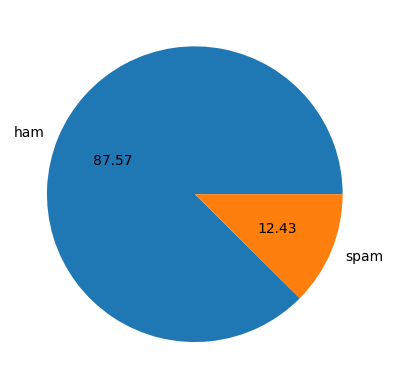

In [67]:
from enum import auto
import matplotlib.pyplot as plt
plt.pie(data['Spam'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [68]:
X_train,X_test,y_train,y_test=train_test_split(data.Message,data.Spam,test_size=0.25)

In [69]:
cv=CountVectorizer()

In [70]:
X_traincv=cv.fit_transform(["hi how are you,how are you doing?","hey whats up","wow cool tutorialsl"])

In [71]:
X_traincv.toarray()

array([[2, 0, 1, 0, 1, 2, 0, 0, 0, 0, 2],
       [0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0],
       [0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0]])

In [72]:
cv.get_feature_names_out()

array(['are', 'cool', 'doing', 'hey', 'hi', 'how', 'tutorialsl', 'up',
       'whats', 'wow', 'you'], dtype=object)

In [73]:
from sklearn.pipeline import Pipeline
clf=Pipeline([('vectorizer',CountVectorizer()),('nb',MultinomialNB())])

In [74]:
clf.fit(X_train,y_train)

Pipeline(steps=[('vectorizer', CountVectorizer()), ('nb', MultinomialNB())])

In [75]:
emails=['Sounds great! are you home now?',
        'will you meet dream partner soon? Is ur career off 2 a flyng start? 2 find out free, txt HORO followed by ur star sign, e. g. HORO ARIES'
]

In [76]:
clf.predict(emails)

array([0, 1])

In [77]:
clf.score(X_test,y_test)

0.9868217054263566